In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

2023-11-02 11:05:19.160453: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 11:05:19.236367: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 11:05:19.237703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 11:05:20.574284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# df_ph = pd.read_csv('Dataset/Ph.csv')
# df_kelembapan = pd.read_csv('Dataset/kelembapan.csv')
df_yield = pd.read_csv('Dataset/Hasil Panen OKE sip.csv')
df_hujan = pd.read_csv('Dataset/curah hujan.csv')
# df_temp = pd.read_csv('Dataset/suhu tanah.csv')
# df_jarak = pd.read_csv('Dataset/jarak tanaman.csv')

In [3]:
## Data Curah Hujan
df_hujan.to_csv('udan.csv', index=False)
df_hujan_baru = pd.read_csv('udan.csv')
df_hujan_baru.info()

## Data Yield
df_yield.to_csv('panen.csv', index=False)
df_panen_baru = pd.read_csv('panen.csv')
df_panen_baru['Produksi Padi (ton/gkg)'] = pd.to_numeric(df_panen_baru['Produksi Padi (ton/gkg)'],errors='coerce')
df_panen_baru = df_panen_baru.loc[:, ~df_panen_baru.columns.str.contains('^Unnamed')]
df_panen_baru.info()
# df_panen_baru

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tahun             60 non-null     int64  
 1   Bulan             60 non-null     object 
 2   curah hujan (mm)  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tahun                    60 non-null     int64  
 1   Bulan                    60 non-null     object 
 2   Luas Lahan               60 non-null     float64
 3   Luas Panen (ha)          60 non-null     float64
 4   Produksi Padi (ton/gkg)  60 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.5+ KB


In [4]:
## Data Yield
df_yield.to_csv('panen.csv', index=False)
df_panen_baru = pd.read_csv('panen.csv')
df_panen_baru['Produksi Padi (ton/gkg)'] = pd.to_numeric(df_panen_baru['Produksi Padi (ton/gkg)'],errors='coerce')
df_panen_baru = df_panen_baru.loc[:, ~df_panen_baru.columns.str.contains('^Unnamed')]
data = pd.merge(df_panen_baru, df_hujan, on=['Tahun', 'Bulan'])

# df_panen_baru.info()

In [5]:
data.shape
#X= 59 -> input
#y= 10 -> fitur/parameter

(60, 6)

In [6]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2018,Januari,43573.0,449.24,2781.16,296.10
1,2018,Februari,43573.0,16598.03,102755.27,273.90
2,2018,Maret,43573.0,9352.41,57899.01,250.60
3,2018,April,43573.0,2512.02,15551.44,177.30
4,2018,Mei,43573.0,9882.90,57103.19,41.30
5,2018,Juni,43573.0,7680.37,44377.02,0.00
6,2018,Juli,43573.0,3594.00,20766.00,0.00
7,2018,Agustus,43573.0,1793.23,10361.25,0.00
8,2018,September,43573.0,2663.34,18230.62,133.30
9,2018,Oktober,43573.0,1703.87,11663.03,142.00


In [7]:
# month_mapping = {
#     'Januari': 1,
#     'Februari': 2,
#     'Maret': 3,
#     'April': 4,
#     'Mei': 5,
#     'Juni': 6,
#     'Juli': 7,
#     'Agustus': 8,
#     'September': 9,
#     'Oktober': 10,
#     'November': 11,
#     'Desember': 12
# }

In [8]:
## Parameter/Fitur
X = data[['curah hujan (mm)', 'Luas Panen (ha)','Luas Lahan']]
## Target
y = data['Produksi Padi (ton/gkg)']

# Onehot encoding

In [9]:
# from sklearn.preprocessing import OneHotEncoder
# df_onehot = pd.get_dummies(data, columns=['Tahun', 'Bulan'], prefix=['Tahun', 'Bulan'])
# data = df_onehot.loc[:, df_onehot.columns != 'Produksi Padi (ton/gkg)']
# data['Produksi Padi (ton/gkg)'] = df_onehot['Produksi Padi (ton/gkg)']

In [10]:
# data.shape

In [11]:
# data.dtypes

In [12]:
# data

# Heat Map

In [13]:
# corrmat = data.corr(method='pearson')
# cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
# plt.subplots(figsize=(64,32))
# sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

# Split

In [14]:
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

In [15]:
data['Bulan'] = data['Bulan'].map(month_mapping)

In [16]:
# data['Tanggal'] = pd.to_datetime(data[['Tahun', 'Bulan']].assign(Day=1))
data['Tanggal'] = pd.to_datetime(data['Tahun'].astype(str) + '-' + data['Bulan'].astype(str) + '-1', format='%Y-%m-%d')
columns_to_drop = ['Bulan', 'Tahun']
data = data.drop(columns_to_drop, axis=1)
data

,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm),Tanggal
0,43573.0,449.24,2781.16,296.10,2018-01-01
1,43573.0,16598.03,102755.27,273.90,2018-02-01
2,43573.0,9352.41,57899.01,250.60,2018-03-01
3,43573.0,2512.02,15551.44,177.30,2018-04-01
4,43573.0,9882.90,57103.19,41.30,2018-05-01
5,43573.0,7680.37,44377.02,0.00,2018-06-01
6,43573.0,3594.00,20766.00,0.00,2018-07-01
7,43573.0,1793.23,10361.25,0.00,2018-08-01
8,43573.0,2663.34,18230.62,133.30,2018-09-01
9,43573.0,1703.87,11663.03,142.00,2018-10-01


In [17]:
data.set_index('Tanggal', inplace=True)
data.sort_index(inplace=True)
data

,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
Tanggal,,,,
2018-01-01,43573.0,449.24,2781.16,296.10
2018-02-01,43573.0,16598.03,102755.27,273.90
2018-03-01,43573.0,9352.41,57899.01,250.60
2018-04-01,43573.0,2512.02,15551.44,177.30
2018-05-01,43573.0,9882.90,57103.19,41.30
2018-06-01,43573.0,7680.37,44377.02,0.00
2018-07-01,43573.0,3594.00,20766.00,0.00
2018-08-01,43573.0,1793.23,10361.25,0.00
2018-09-01,43573.0,2663.34,18230.62,133.30


# Split

In [18]:
test_split=round(len(data)*0.20)
data_training=data[:30]
data_testing=data[30:]
print(data_training.shape)
print(data_testing.shape)

(30, 4)
(30, 4)


In [19]:
data_training.shape

(30, 4)

In [20]:
scaler = MinMaxScaler()
data_training_scaled = scaler.fit_transform(data_training)
data_testing_scaled=scaler.transform(data_testing)
data_training_scaled, data_testing_scaled

(array([[1.        , 0.        , 0.        , 0.50194948],
        [1.        , 0.78015363, 0.81782942, 0.46431599],
        [1.        , 0.43011522, 0.45088673, 0.42481777],
        [1.        , 0.09965361, 0.10446615, 0.30055942],
        [1.        , 0.45574338, 0.44437659, 0.07001187],
        [1.        , 0.34933839, 0.34027128, 0.        ],
        [1.        , 0.15192444, 0.1471234 , 0.        ],
        [1.        , 0.06492862, 0.06200826, 0.        ],
        [1.        , 0.10696394, 0.12638295, 0.2259705 ],
        [1.        , 0.06061161, 0.07265736, 0.24071877],
        [1.        , 0.0230194 , 0.02908529, 0.53754874],
        [1.        , 0.00566487, 0.00897015, 0.52771656],
        [0.60223061, 0.02995966, 0.02896455, 0.56026445],
        [0.60223061, 0.18642866, 0.18559408, 0.44160027],
        [0.60223061, 1.        , 1.        , 0.68486184],
        [0.60223061, 0.09160366, 0.09067177, 0.43453128],
        [0.60223061, 0.11532114, 0.11429868, 0.16131548],
        [0.602

In [21]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i, 2])
    return np.array(dataX),np.array(dataY)
X_train,y_train=createXY(data_training_scaled,2)
X_test,y_test=createXY(data_testing_scaled,2)

In [22]:
print("trainX Shape-- ",X_train.shape)
print("trainY Shape-- ",y_train.shape)

trainX Shape--  (28, 2, 4)
trainY Shape--  (28,)


In [23]:
print("testX Shape-- ",X_test.shape)
print("testY Shape-- ",y_test.shape)

testX Shape--  (28, 2, 4)
testY Shape--  (28,)


In [24]:
print("trainX[0]-- \n",X_train[0])
print("trainY[0]-- ",y_train[0])

trainX[0]-- 
 [[1.         0.         0.         0.50194948]
 [1.         0.78015363 0.81782942 0.46431599]]
trainY[0]--  0.4508867280421174


In [25]:
X_train.shape[1], X_test.shape[2], X_train.shape[0]

(2, 4, 28)

In [26]:
# from sklearn.model_selection import TimeSeriesSplit
# tss = TimeSeriesSplit(n_splits = 3)
# for train_index, test_index in tss.split(X):
#     X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [27]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()

In [28]:
# X_train.shape[0]

# RNN 

In [345]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
# model.compile(loss=mean_squared_error, optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, epochs=250, batch_size=8, callbacks=EarlyStopping(monitor='loss'))
model.summary()

Epoch 1/250
4/4 [==============================] - 6s 8ms/step - loss: 0.1233
Epoch 2/250
4/4 [==============================] - 0s 10ms/step - loss: 0.1198
Epoch 3/250
4/4 [==============================] - 0s 10ms/step - loss: 0.1185
Epoch 4/250
4/4 [==============================] - 0s 11ms/step - loss: 0.1140
Epoch 5/250
4/4 [==============================] - 0s 13ms/step - loss: 0.1118
Epoch 6/250
4/4 [==============================] - 0s 14ms/step - loss: 0.1088
Epoch 7/250
4/4 [==============================] - 0s 12ms/step - loss: 0.1071
Epoch 8/250
4/4 [==============================] - 0s 15ms/step - loss: 0.1024
Epoch 9/250
4/4 [==============================] - 0s 12ms/step - loss: 0.1009
Epoch 10/250
4/4 [==============================] - 0s 15ms/step - loss: 0.0979
Epoch 11/250
4/4 [==============================] - 0s 15ms/step - loss: 0.0960
Epoch 12/250
4/4 [==============================] - 0s 16ms/step - loss: 0.0946
Epoch 13/250
4/4 [==============================] 

In [346]:
prediction = model.predict(X_test)
prediction

1/1 [==============================] - 1s 981ms/step


array([[0.08063307],
       [0.0583434 ],
       [0.05892662],
       [0.06921727],
       [0.08989729],
       [0.11686786],
       [0.11269207],
       [0.0840997 ],
       [0.08657221],
       [0.06720714],
       [0.07598604],
       [0.08783842],
       [0.060909  ],
       [0.06073899],
       [0.07709215],
       [0.09152568],
       [0.09355172],
       [0.0746411 ],
       [0.09039537],
       [0.11869278],
       [0.09661751],
       [0.07073232],
       [0.09018227],
       [0.10844848],
       [0.08832746],
       [0.09826017],
       [0.08506147],
       [0.10239846]], dtype=float32)

In [347]:
prediction.shape

(28, 1)

In [348]:
# scaler.inverse_transform(prediction)
prediction_copies_array = np.repeat(prediction,4, axis=-1)
prediction_copies_array

array([[0.08063307, 0.08063307, 0.08063307, 0.08063307],
       [0.0583434 , 0.0583434 , 0.0583434 , 0.0583434 ],
       [0.05892662, 0.05892662, 0.05892662, 0.05892662],
       [0.06921727, 0.06921727, 0.06921727, 0.06921727],
       [0.08989729, 0.08989729, 0.08989729, 0.08989729],
       [0.11686786, 0.11686786, 0.11686786, 0.11686786],
       [0.11269207, 0.11269207, 0.11269207, 0.11269207],
       [0.0840997 , 0.0840997 , 0.0840997 , 0.0840997 ],
       [0.08657221, 0.08657221, 0.08657221, 0.08657221],
       [0.06720714, 0.06720714, 0.06720714, 0.06720714],
       [0.07598604, 0.07598604, 0.07598604, 0.07598604],
       [0.08783842, 0.08783842, 0.08783842, 0.08783842],
       [0.060909  , 0.060909  , 0.060909  , 0.060909  ],
       [0.06073899, 0.06073899, 0.06073899, 0.06073899],
       [0.07709215, 0.07709215, 0.07709215, 0.07709215],
       [0.09152568, 0.09152568, 0.09152568, 0.09152568],
       [0.09355172, 0.09355172, 0.09355172, 0.09355172],
       [0.0746411 , 0.0746411 ,

In [349]:
prediction_copies_array.shape

(28, 4)

In [350]:
label = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), 4, axis=-1))[:, 2]

In [351]:
pred = scaler.inverse_transform(prediction_copies_array)[:, 2]

In [352]:
# pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),4)))[:,2]

In [353]:
# original_copies_array = np.repeat(y_test,4, axis=-1)
# original=scaler.inverse_transform(np.reshape(original_copies_array,(len(y_test),4)))[:,2]

In [354]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,label)

Pred Values--  [12638.006  9913.246  9984.54  11242.503 13770.495 17067.465 16557.002
 13061.778 13364.026 10996.778 12069.938 13518.812 10226.873 10206.091
 12205.153 13969.555 14217.224 11905.529 13831.382 17290.549 14591.997
 11427.707 13805.332 16038.254 13578.594 14792.801 13179.349 15298.68 ]

Original Values--  [ 18754.71  13395.53  13048.93    268.36   2514.4   38615.05  90703.72
  23672.07   5377.67  95596.82  37155.99  12286.86   3529.16  20564.27
  10208.79   2118.79    618.63 102194.51  90703.72  13965.33  14177.11
 107551.27  27669.02  14655.14   6836.77  22863.35   8304.24   1703.11]


In [355]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, pred)

mae = mean_absolute_error(y_test, pred)

mape = mean_absolute_percentage_error(y_test,pred)

r2 = r2_score(y_test, pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 179530339.08432725
Mean Absolute Error (MAE): 13240.848523094372
Mean Absolute Error (MAPE): 595740.8617334442
r2 Score: -2370938136.771189


In [356]:
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense

# # Define the build_model function with **kwargs to accept hyperparameters
# def build_model(**kwargs):
#     optimizer = kwargs.pop('optimizer', 'adam')  # Get the optimizer, default to 'adam'
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(LSTM(50, return_sequences=False))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     model.compile(loss='mse', optimizer=optimizer)
#     return model

# # Create the KerasRegressor with build_fn
# grid_model = KerasRegressor(build_fn=build_model, verbose=1)

# # Define the parameter grid for GridSearchCV
# parameters = {
#     'batch_size': [16],
#     'epochs': [10],
#     'optimizer': ['adam']
# }

# # Create GridSearchCV
# grid_search = GridSearchCV(estimator=grid_model, param_grid=parameters, cv=2)
# grid_search = grid_search.fit(X_train, y_train)

# # Access the best model directly
# my_model = grid_search.best_estimator_

# # Make predictions
# prediction = my_model.predict(X_test)
# print("Prediction\n", prediction)
# print("\nPrediction Shape:", prediction.shape)

## Plot Hasil Prediksi

In [357]:
# # Visualisasi data aktual dan prediksi dari model LSTM
# plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Aktual', marker='o')
# plt.plot(y_pred, label='Prediksi LSTM', linestyle='--', marker='x')
# plt.xlabel('Indeks Data')
# plt.ylabel('Nilai Target')
# plt.title('Perbandingan Data Aktual dan Prediksi dari Model LSTM')
# plt.legend()
# plt.grid(True)
# plt.show()

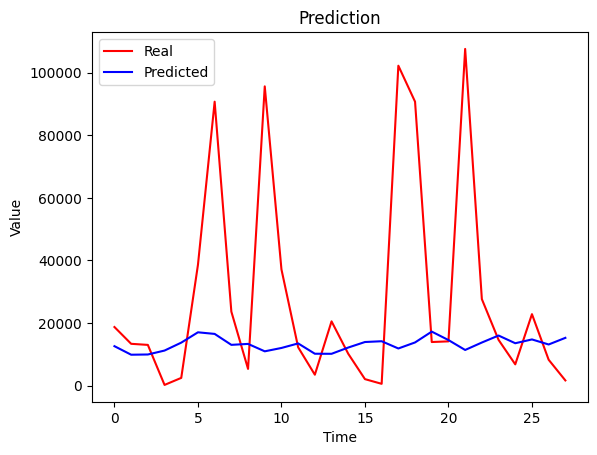

In [358]:
plt.plot(label, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()